In [1]:
# Mongo 연결
from pymongo import MongoClient as mc
import random
import pprint as pp

mongo_uri = "mongodb://localhost:27017"
client = mc(mongo_uri)

keti_pr_db = client.keti_pattern_recognition
household_col = keti_pr_db.household_info

total = household_col.count()
db_datas = {}
n_total = 20
for n in range(0, n_total):
    ran_datas = list(household_col.\
                find().skip(random.randrange(0,total)).limit(1))[0]
    
    if ran_datas['uid'] not in db_datas:
        db_datas[ran_datas['uid']] = ran_datas

client.close()

<ipython-input-1-94a471b26ff3>:12: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  total = household_col.count()


In [2]:
# require module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

sns.set(rc={'figure.figsize': (15.7, 13.27)})
plt.rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

# custom module
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import custom.supports as sp
import custom.mapgenerator as mg
import custom.dateutils as du

SEASONS = {
    "봄" : [3, 4, 5],
    "여름" : [6, 7, 8],
    "가을" : [9, 10, 11],
    "겨울" : [12, 1, 2]
}

SEASONSARR = ['봄','여름','가을','겨울']

'''
 0 : 봄
 1 : 여름
 2 : 가을
 3 : 겨울
'''

# Day Split
DAYARR = ["월", "화", "수", "목", "금", "토", "일"]

In [3]:
dict_data = {}

for uid in db_datas.keys():
    uid, timeslot = db_datas[uid]['uid'], db_datas[uid]['timeslot']
    
    datelist = [
        dt.strptime(ts['time'], "%Y-%m-%d T%H:%M %z").date()
        for ts in timeslot
    ]
    datelist = list(set(datelist))
    datelist.sort()

    ts_datas = {}
    start_idx = 0
    end_idx = 96
    
    for date in datelist:
        ts_datas[date] = [ ts['power'] for ts in timeslot[start_idx:end_idx]]
        start_idx = end_idx
        end_idx = end_idx + 96
        
    ts_datas = pd.DataFrame(ts_datas).T
    datas = ts_datas.reset_index().copy()
    
    datas.rename(columns={"index": "date"}, inplace=True)
    datas['date'] = pd.to_datetime(datas['date'])
    datas['month'] = [dt.month for dt in datas['date']]
    datas = [
        datas[(datas['month'].isin(SEASONS[season]))].copy()
        for season in SEASONSARR
    ]
    
    season_datas = {}
    for season_idx, season in enumerate(SEASONSARR):
        season_datas[season] = datas[season_idx].copy()
    dict_data[uid] = season_datas

20가구에 대하여 비교하고 싶은 계절을 입력해주세요.
(봄/여름/가을/겨울)봄


<AxesSubplot:xlabel='x', ylabel='y'>

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


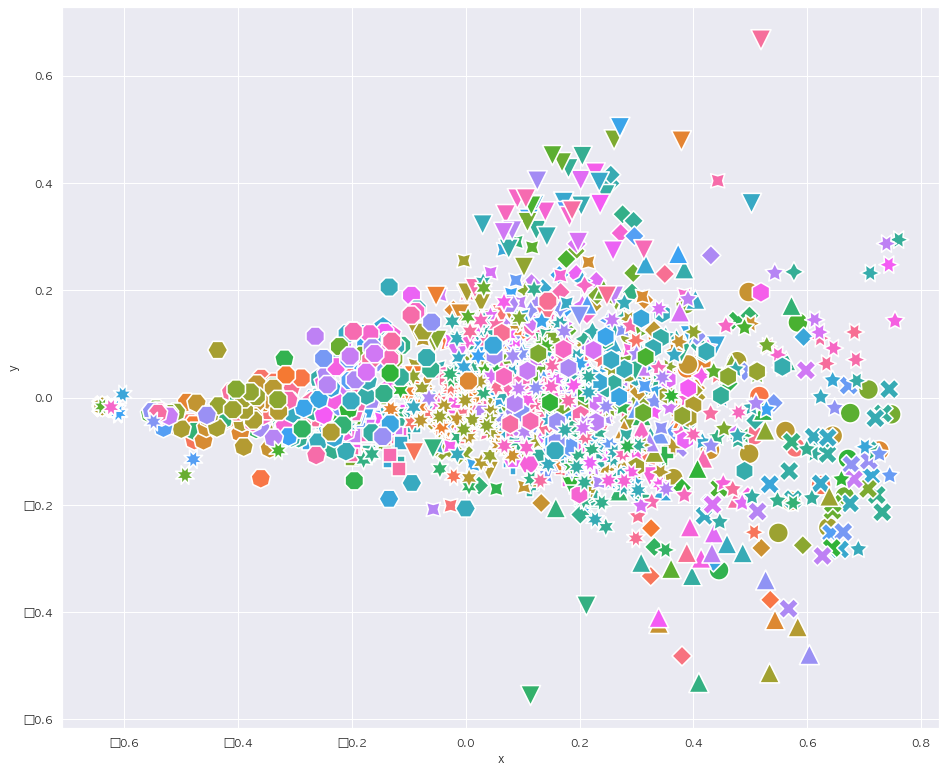

In [4]:
season = input("""{}가구에 대하여 비교하고 싶은 계절을 입력해주세요.
(봄/여름/가을/겨울)""".format(n_total))

all_datas = pd.DataFrame()
for uid in dict_data.keys():
    datas = dict_data[uid][season]\
        [dict_data[uid][season]
             .columns.difference(['month'])].copy()
    datas['uid'] = uid
    all_datas = pd.concat([all_datas, datas])
    
all_datas.set_index(['uid','date'], inplace=True)
outlier = sp.remove_outlier(all_datas)
rmout_datas = all_datas.loc[
        ~all_datas.index.isin(outlier)
    ].copy()

pca_datas = sp.get_kmeans_pca(rmout_datas)
pca_datas

sns.scatterplot(data=pca_datas, x="x", y="y",
                    hue="date",style="uid", s=400, legend=False)

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class '

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class '

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class '

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


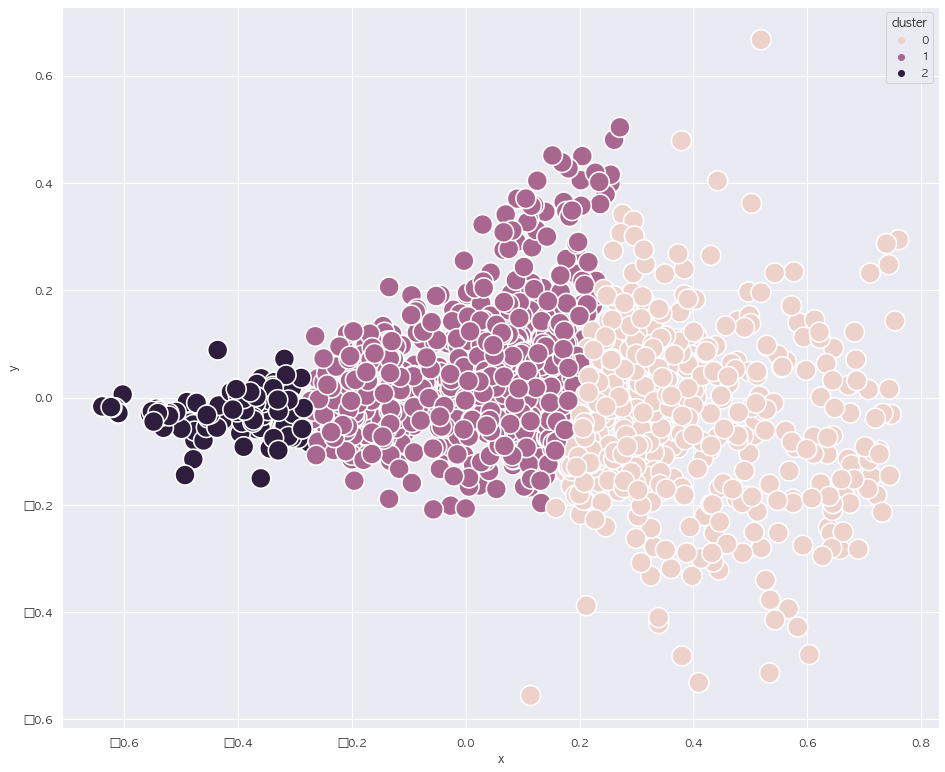

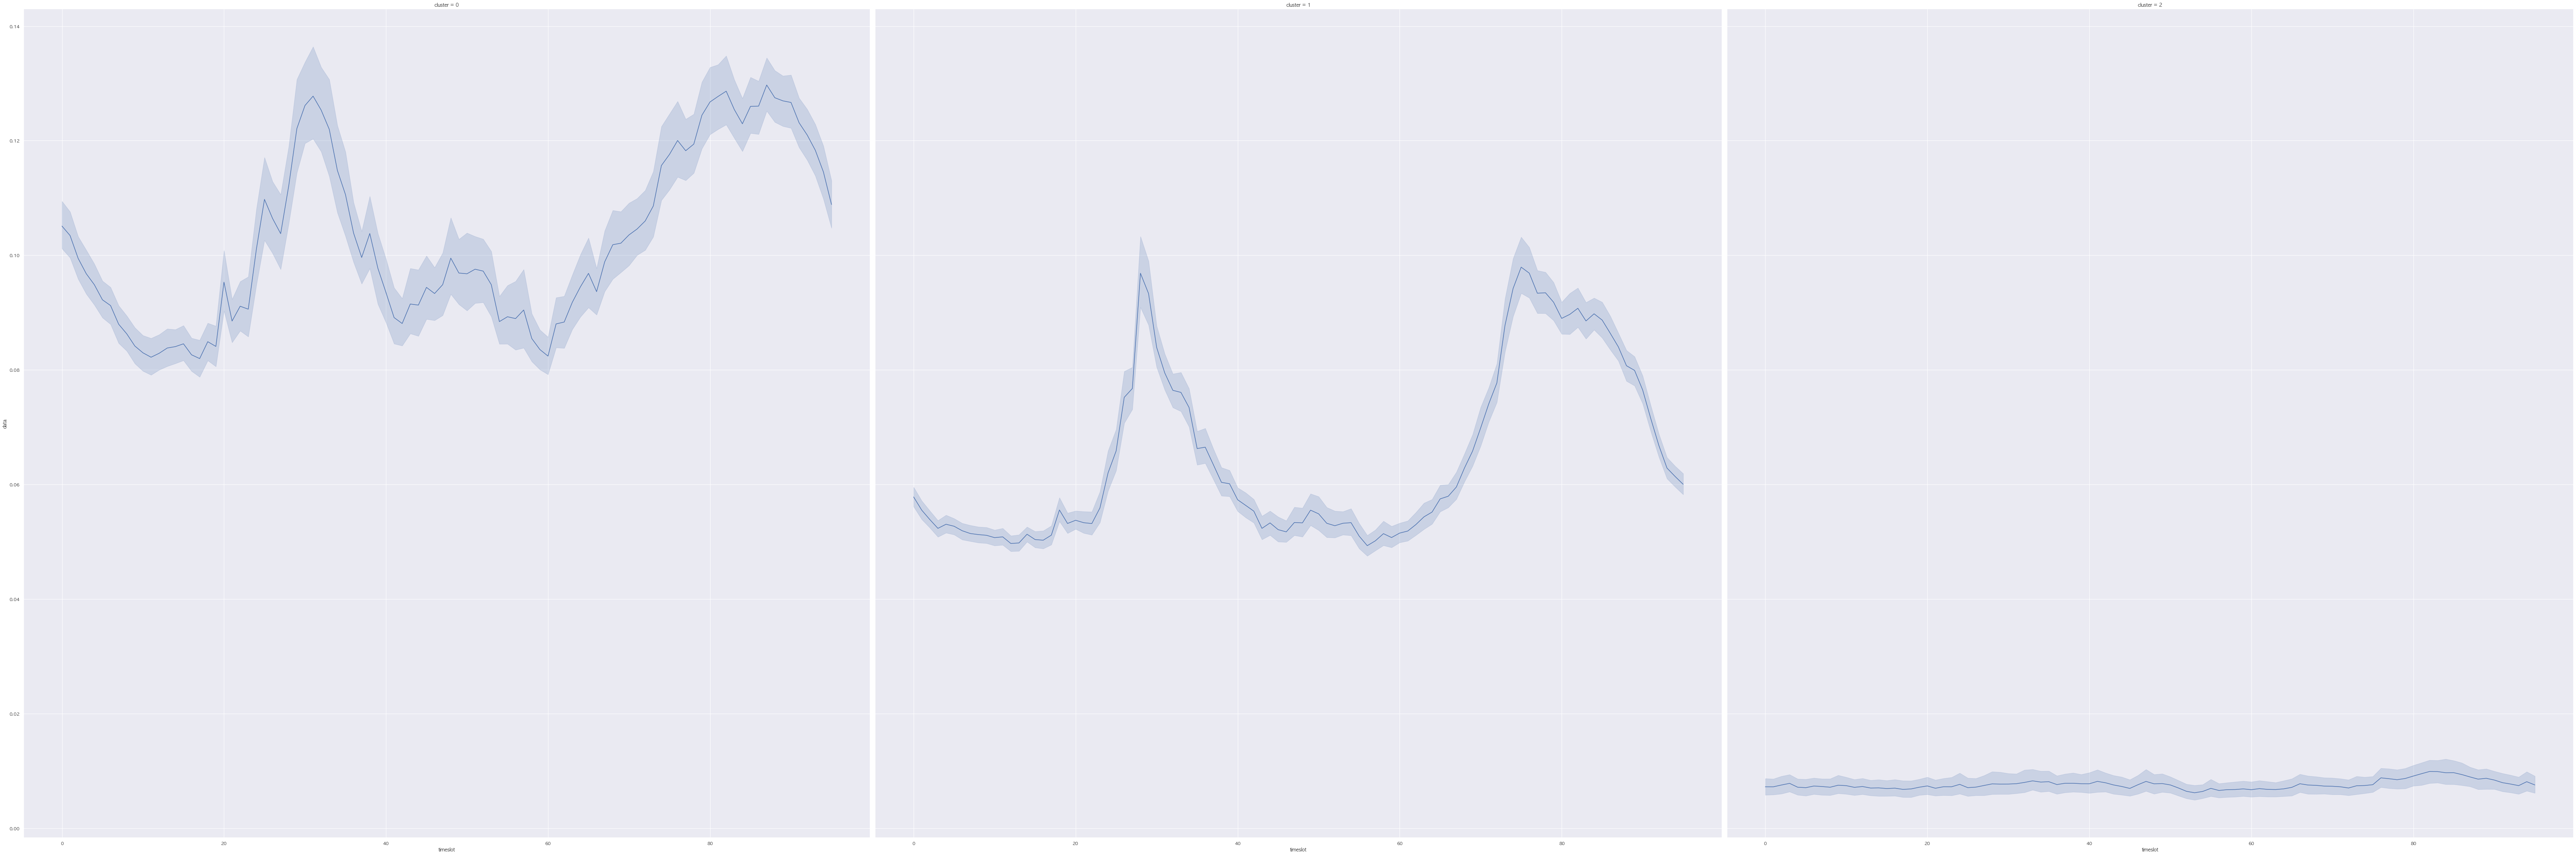

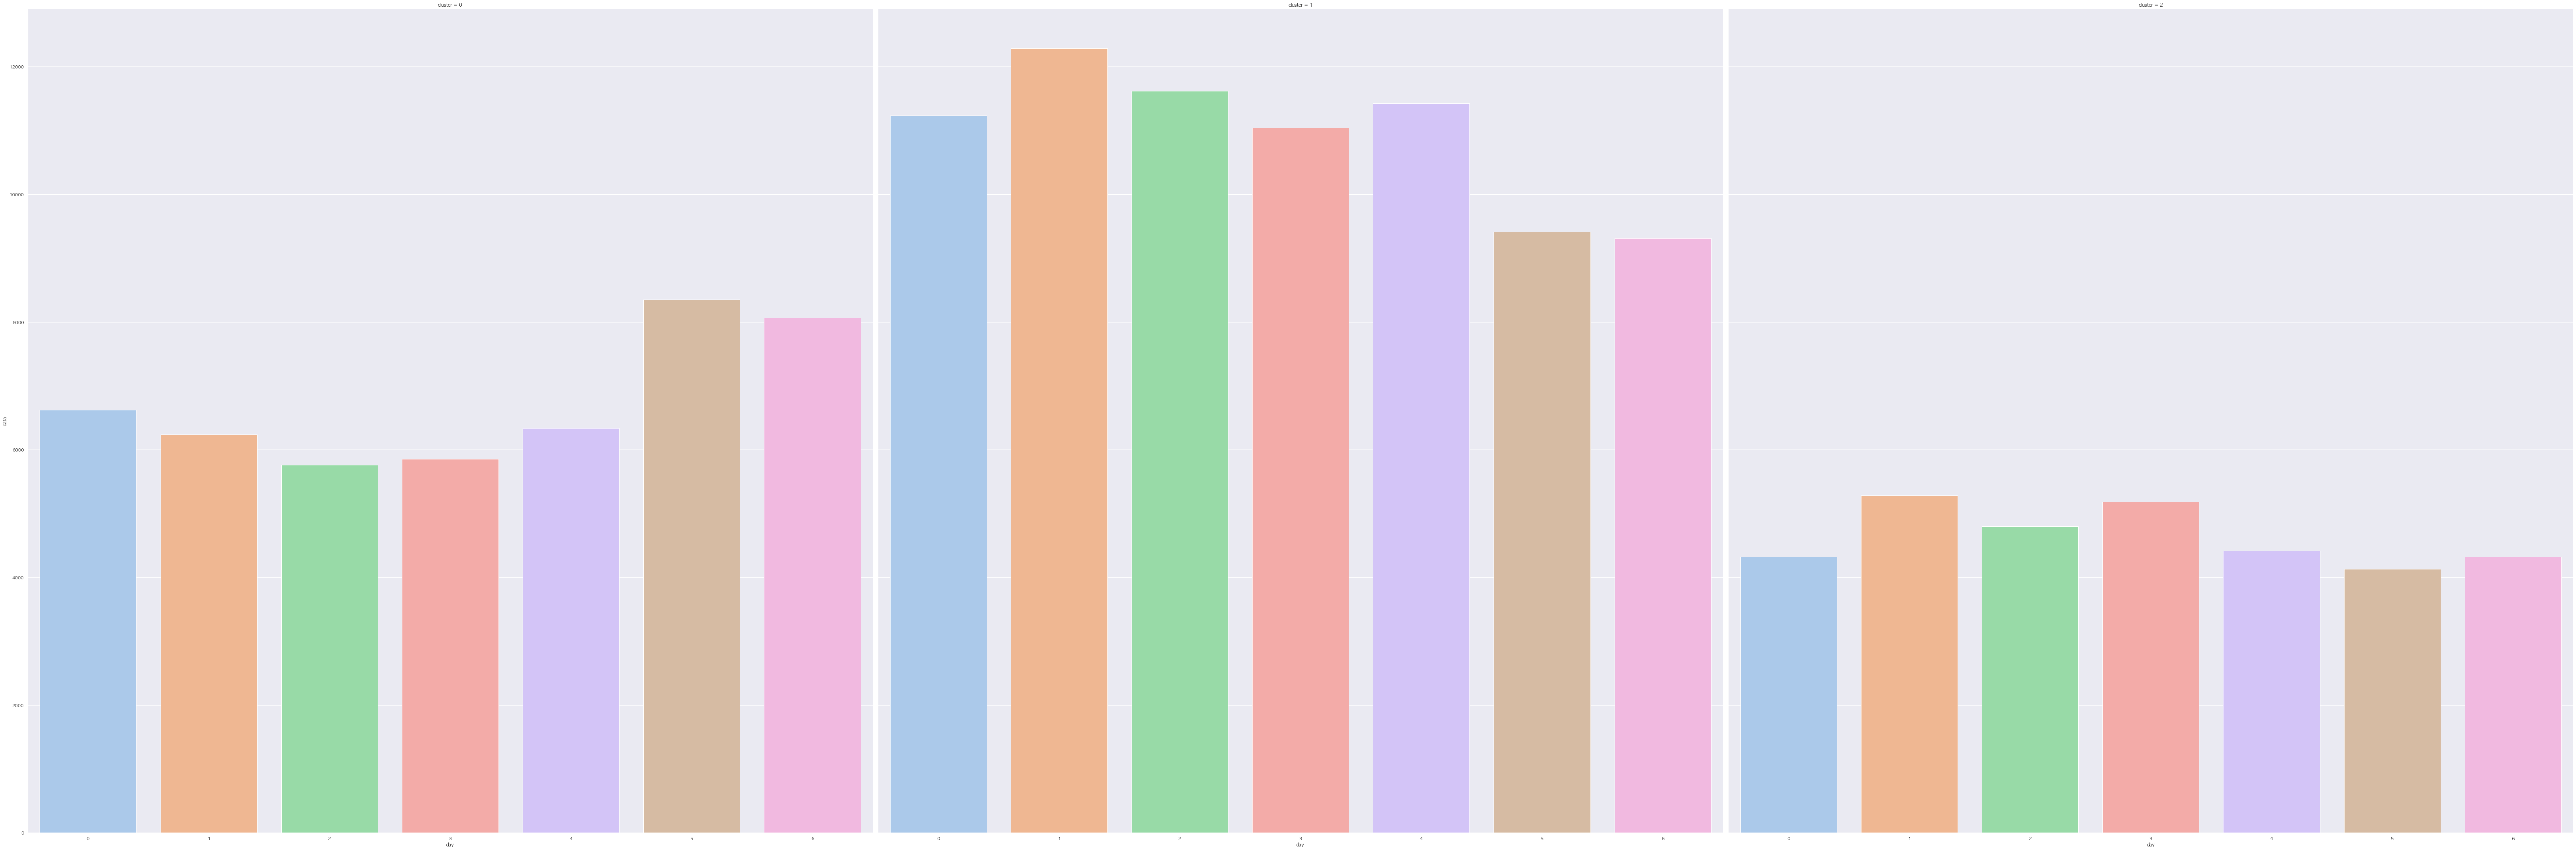

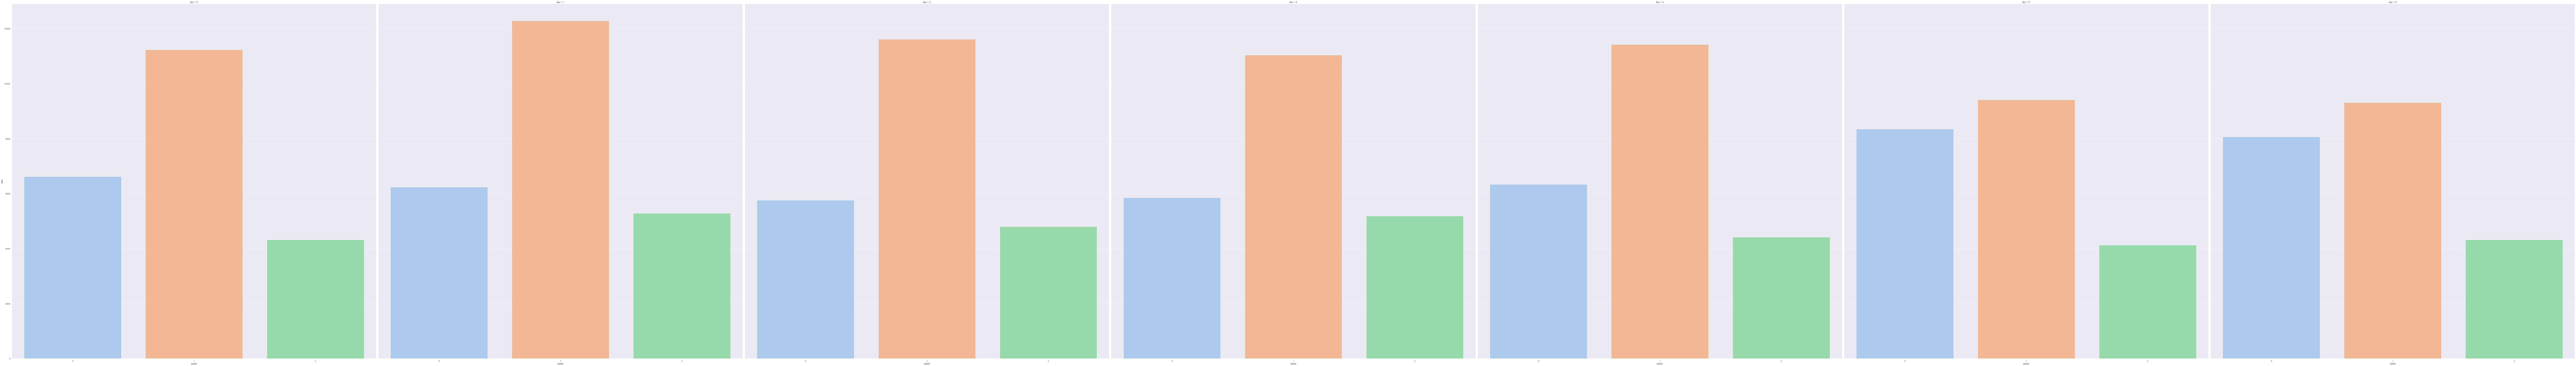

In [5]:
kmeans_points = pca_datas[['x','y']].values
K, k_range, inertia_arr = sp.elbow_k_check(15, kmeans_points)

cluster_pca_datas,\
    cluster_info = sp.run_kmeans(K, pca_datas, rmout_datas)

# Day Append
cluster_map_datas = mg.get_map_datas_cluster(season_datas,rmout_datas, cluster_info)
cluster_map_datas['day'] = cluster_map_datas['date'].dt.weekday
cluster_map_datas['day_kr'] = [du.day_to_kr(day) for day in cluster_map_datas['day']]

# Visualization
sns.scatterplot(data=cluster_pca_datas, x="x", y="y",
           hue="cluster", s=400)

# cluster_line_map = sns.FacetGrid(cluster_map_datas, col='cluster', col_wrap=K, height=30)
# cluster_line_map.map(sns.lineplot, "timeslot","data","date")

cluster_line_map = sns.FacetGrid(cluster_map_datas, col='cluster', col_wrap=K, height=30)
cluster_line_map.map(sns.lineplot, "timeslot","data")

statistic_datas = sp.get_statistic_cluster_datas(cluster_map_datas)
statistic_datas['day'] = [ du.kr_to_day(kr) for kr in statistic_datas['day_kr']]

cluster_bar_map = sns.FacetGrid(statistic_datas, col='cluster', col_wrap=7, height=30)
cluster_bar_map.map(sns.barplot, "day", "data", palette="pastel")
cluster_bar_map = sns.FacetGrid(statistic_datas, col='day', col_wrap=7, height=30)
cluster_bar_map.map(sns.barplot, "cluster", "data", palette="pastel")